# Importing updated micrograd module

In [1]:
!git clone -b micrograd-nn-karpathy https://github.com/mratanusarkar/Learning-DeepLearning.git &> /dev/null
%cd /content/Learning-DeepLearning/Neural\ Networks\ -\ Zero\ to\ Hero
!python setup.py install &> /dev/null

/content/Learning-DeepLearning/Neural Networks - Zero to Hero


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import random
random.seed(2023)

from micrograd.engine import Value
from micrograd.nn import NoobMLP
from micrograd.visualize import draw_dot

# Importing code from the previous notebook

In [4]:
# import code from MLP to Loss Function

In [5]:
# model
n = NoobMLP(3, [4, 4, 1], 'classifier')

In [6]:
# data
data = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

target = [1.0, -1.0, -1.0, 1.0]

In [7]:
# forward pass and prediction
ypred = [n(x)[0] for x in data]

In [8]:
# loss
loss = sum((yout - ygt)**2 for ygt, yout in zip(target, ypred)) / 4
loss.label='mse loss'
print(loss)

Value(label=mse loss, data=1.7700598649634718, grad=0.0)


In [9]:
# backpropagation
loss.backward()

In [10]:
# collecting the model parameters
print("total number of parameters:", len(n.parameters()))

total number of parameters: 41


# Optimization and Gradient Descent

In [11]:
# data
data = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

target = [1.0, -1.0, -1.0, 1.0]

In [12]:
# forward pass and prediction
ypred = [n(x)[0] for x in data]

# loss
loss = sum((yout - ygt)**2 for ygt, yout in zip(target, ypred)) / 4
loss.label='mse loss'
print(loss)

Value(label=mse loss, data=1.7700598649634718, grad=0.0)


In [13]:
# zero grad (becalue in our Value, we keep adding the grads)
for p in n.parameters():
    p.grad = 0.0

# backpropagation
loss.backward()

In [14]:
# as discussed in the previous notebook, let's change the model parameters to reduce the cost

In [15]:
# let's take a look at a single parameter and it's gradient
# let's see the first layer's first neuron's frirst weight:
print("wo value", n.layers[0].neurons[0].w[0].data)
print("wo grad", n.layers[0].neurons[0].w[0].grad)

wo value -0.2341561510915824
wo grad 0.0018934539136490204


In [16]:
# now grad here is nothing but rate of change of loss
# if we increase the value of w0 towards grad, loss will increase
# and if we decrease it, the loss will decrease! (which we want to optimize our nn)
# and we introduce a learning rate to control at the rate of gradient descent steps

In [17]:
# gradient descent, and update the params with new values (going downhill)
alpha = 0.01    # learning rate
for p in n.parameters():
    p.data = p.data - (alpha * p.grad)

In [18]:
# if alpha is too big, you make too big of a step, and may overfit, and the loss will blow up!
# there are techniques where we keep bigger learning rate, and slowly make them smaller... we will see all those in future
# if it is too low, it will take long to converge, and eat up computation resources
# if it's too big, it will get unstable and explode the loss

In [19]:
# see and compare the results
ypred = [n(x)[0] for x in data]
print("y target:", target)
print("y pred  :", [pred.data for pred in ypred])
loss = sum((yout - ygt)**2 for ygt, yout in zip(target, ypred)) / 4
print("loss:", loss.data)
loss.backward()

y target: [1.0, -1.0, -1.0, 1.0]
y pred  : [0.8610248251530874, 0.8425899209094534, 0.9037515775288634, 0.8608678816633576]
loss: 1.764519882789328


In [20]:
# so on running the above cells multiple times, we can see:
# -> the loss go dowm
# -> the y-pred is slowly reaching towards y-target
# -> the model parameters getting tuned, and hence learning to adapt to the training data

# and that's essentailly steps of gradient descent or optimization
# if we now run this in loops or multiple "training steps", we essesntally have a training algorithm for our nn!

In [21]:
# to break down training iteraton: 
# 1. we make a forward pass - get ypred
# 2. calculate loss - L(x) ~ | ytarget - ypred |
# 3. reset the grads - grad = 0 (because the grads keep accumulating in the expression graph)
# 4. backpropagate, and get the new grads 
# 5. tune or nudge the mode params (w&b) - p = p - (alpha * p.grad)
# and back to "step 1"

# Training

In [22]:
steps = 500    # num of training steps (gradient descent iterations)
alpha = 0.01    # learning rate

training_metadata = []
for i in range(steps):
    # forward pass
    ypred = [n(x)[0] for x in data]

    # calculate loss
    loss = sum((yout - ygt)**2 for ygt, yout in zip(target, ypred)) / 4

    # zero grad (don't forget!)
    for p in n.parameters():
        p.grad = 0.0
    
    # backward pass
    loss.backward()

    # optimize and update model params
    for p in n.parameters():
        p.data += -alpha * p.grad

    meta = {}
    meta['step'] = i
    meta['y_pred'] = [pred.data for pred in ypred]
    meta['loss'] = loss.data
    training_metadata.append(meta)

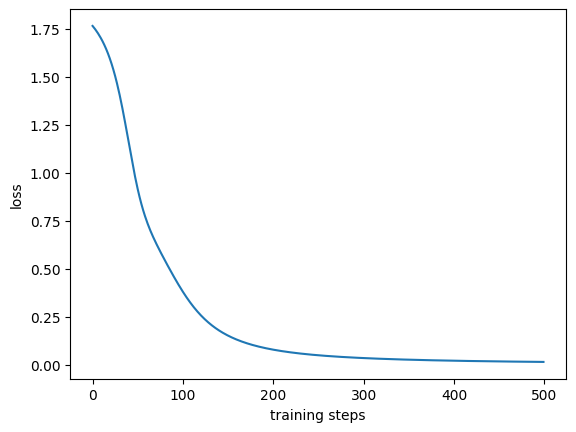

In [23]:
# taking a look at loss w.r.t training steps or iteration count
plt.plot([meta['step'] for meta in training_metadata], [meta['loss'] for meta in training_metadata])
plt.xlabel("training steps")
plt.ylabel("loss")
plt.show()

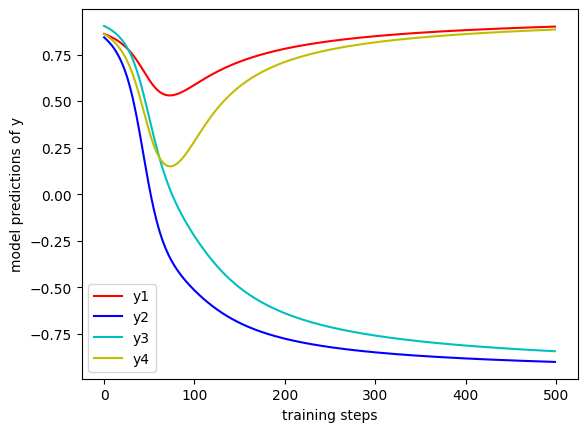

In [24]:
# let's take a look at how the model predected y changed throughout the model training steps
# and how they slowly became more and more close to the actual y target values in the training example
# remember: we are only nudging the model params, by tiny amount, using the grad info in each iteration
# and that's how the model is learning from the training examples 
# (after training, model will face real data, and these learnt params will remain. and with the full mathametical function, it will compute and give us predictions)

plt.plot([meta['step'] for meta in training_metadata], [meta['y_pred'][0] for meta in training_metadata], 'r', label ='y1')
plt.plot([meta['step'] for meta in training_metadata], [meta['y_pred'][1] for meta in training_metadata], 'b', label ='y2')
plt.plot([meta['step'] for meta in training_metadata], [meta['y_pred'][2] for meta in training_metadata], 'c', label ='y3')
plt.plot([meta['step'] for meta in training_metadata], [meta['y_pred'][3] for meta in training_metadata], 'y', label ='y4')
plt.xlabel("training steps")
plt.ylabel("model predictions of y")
plt.legend()
plt.show()

In [25]:
# let's look at our model predictions after n training steps
print("y target:", target)
print("y pred  :", [pred.data for pred in [n(x)[0] for x in data]])
loss = sum((yout - ygt)**2 for ygt, yout in zip(target, ypred)) / 4
print("loss:", loss.data)

y target: [1.0, -1.0, -1.0, 1.0]
y pred  : [0.900287018551332, -0.9003989555631917, -0.8431085141916159, 0.8845627174387275]
loss: 0.014496368064463831


In [26]:
# and we see the predicted values are now extremely close to the target values

# Some Thoughts 🤔

In [27]:
# remember, neural networks are nothing fancy, it's just a mathematical function (as we see in the expression graph)
# and the model params (w & b) are learnt through training steps using training data

# to export the model, we just need to know the model expression graph, and the trained params (w & b)
# that people are spending huge amount of money on computation resources.

# and it's no magic, the better training data you have, better the model will be (because it learns from the data)
# (eg: GPT-4 is trained on approx 45 gigabytes of training data)
# and more complex the model is (eg: GPT-4 has one trillion parameters), the more complex the function would be,
# capable of doing complex tasks

# and there are other challenges of overfit, underfit, preparing the data, etc etc which we will look at in future

In [28]:
# in short, these were just the basics.
# every notebook can be now explored to see other dirrerent options that could have been chosen

In [29]:
# For Example: 

# * what model architecture to choose?
# * what type of model is good for what kind of problems?
# * what ways can I collect better data?
# * what pre-processing steps or transformations or encodings can I do on my data for better results?
# * what data standerdization can I do, so that gradient descent becomes smoother?
# * what activation function is good for my case?
# * what loss function to choose for my problem?
# * how to evaluate my model performance?
# * what metric do I choose for the same?
# * what way shall I break my dataset (batch size, chunk size)
# * what ratio to choose for train, test, val dataset
# * is my data uniformly distributed to my datasets?
# * how can I parallelize my data loader pipeline or training pipeline?
# * what hardware to choose? GPU? TPU?
# * how to customize my code to run on those hardware? (eg: CUDA programming)
# * what optimization process to choose during training my network?
# * what will be the step size or how many training iterations do I run?
# * after training: is my model overfit or underfit?
# * how to tackle the same?
# * what fine-tuning do I do?
# * do I use a pre-trained model and train on top of it for my problem?
# * tackle corner cases for model behaviour on un-seen data
# * use experiment tracking on my ML pipeline to cherry pick model artifacts based on performance metrics
# * how to deploy my model to production?

# and there are many many many more questions... that makes the field challeging and interesting!
# will try to cover them all slowly as I learn...

In [30]:
# PS: also anyone coming across this notebook and the entire series,
# feel free to correct me if my understanding is incorrect or inaccurate anywhere!
# would love to learn more or correct any misunderstandings I have